In [131]:
from __future__ import print_function

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
% matplotlib inline

300
300


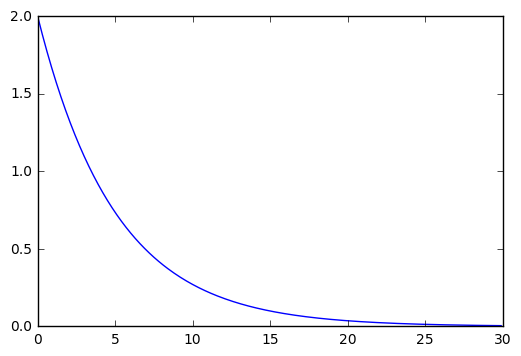

In [133]:
dt = 0.1
x0=2
coef = -0.2
t = np.arange(0,30,dt)
x = odeint(lambda x,t:coef*x,x0,t)
print(len(x))
print(len(t))
plt.plot(t,x)

In [134]:
dx = np.gradient(x[:,0],dt)

In [135]:
import numpy as np
import ffx

def run_ffx(train_X, train_y, test_X, test_y, varnames):
    models = ffx.run(train_X, train_y, test_X, test_y, varnames)
    base = [model.numBases() for model in models]
    test_error = [model.test_nmse for model in models]
    train_error = [ffx.core.nmse(model.simulate(train_X), train_y, min(train_y), max(train_y)) 
                   for model in models]
    print("model   model.numBases   test_err    train_err")
    for model,test_err,train_err in zip(models,test_error,train_error):
        print(model,"  ",model.numBases(),"  ",test_err,"   ",train_err)
        
    return ([base, test_error], [base, train_error], models)

In [136]:
train_x = x
test_x = x
train_y = dx
test_y = dx
varnames = 'x'
dxdt_fitted_result = run_ffx(train_x,train_y,test_x,test_y,varnames)

/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-1][:ss.numAlphas() / 4]


model   model.numBases   test_err    train_err
-0.0672    0    0.2412675825302421     0.2412675825302421
-0.00277 - 0.192*x    1    0.009572860896968665     0.009572860896968665


In [109]:
def pre_func(x,t):
    return -0.00277 - 0.192*x
pre_result = odeint(pre_func,x0,t)

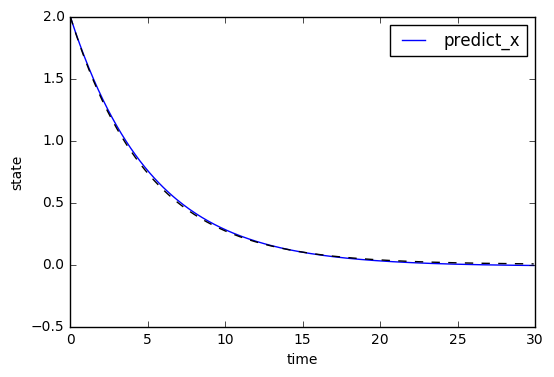

In [110]:
plt.plot(t,pre_result[:,0],label='predict_x')
plt.plot(t,x[:,0],'k--')
plt.legend()
plt.xlabel('time')
plt.ylabel('state')

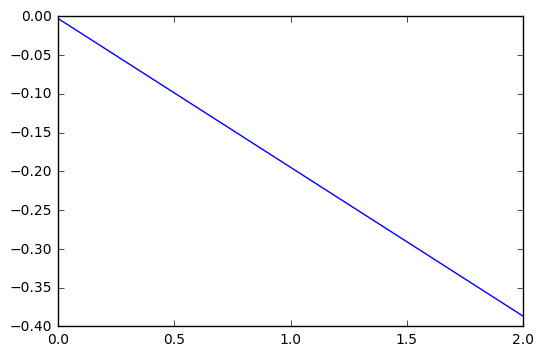

In [111]:
plt.plot(x,-0.00277 - 0.192*x)